# TFC - 2º entrega intercalar

In [23]:
#All imports used
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)

pandas: 2.1.4
numpy: 1.26.3
seaborn: 0.13.1


In [24]:
# limpeza de dados e produçao dataframe

dict = {}
study_groups = {'Music', 'Book', 'DVD'}
dfs = []
dfs_cats = []
dfs_similars = []

def read_archive():
    #archives = "teste.txt"
    archives = "amazon-meta.txt"

    file = open(archives, "r", encoding="UTF-8")
    lines = file.readlines()
    asin = None
    similarities = []
    group = None
    title = None  #--Prof-- cada objeto so tem um titulo, portanto nao ha necessidade de usar uma lista, coloca None
    customer_ids = []
    cats_list = []
    most_frequent_categories = ""


    for line in lines:
        study_line = line.strip()
        #obter o grupo
        if study_line.startswith("group: "):
            group = study_line.split(":")[1].strip()

        #obter id do produto
        if study_line.startswith("ASIN: "):
            asin = study_line.split(":")[1].strip() #--Prof-- colocar .strip()
            similarities = []

        #obter titulo do produto
        if study_line.strip().startswith("title"):
            current_title = line.split(":", 1)[1].strip()
            # Append the title to the array
            title = current_title #--Prof-- title = current_title

        #obter lista de produtos semelhantes
        if study_line.startswith("similar: ") and (group in study_groups):
            similarities = study_line.split()[2:]  #--Prof-- podes simplificar p/ similarities = study_line.split()[2:]
            #--Prof-- remover esta linha, estas a adicionar a lista a ela propria, ficando c/ duplicados
            #--Prof-- remover esta linha

        #obter categorias - 1º retiramos o espaço, 2º retiramos o '|', 3º retiramos os numero identificador da categoria
        if study_line.strip().startswith("|") and (group in study_groups):
            try:
                #obtermos a categoria na posiçao 3 (colocamos 3 no array porque contamos com o espaço)
                category = study_line.strip().split('|')[3] #--Prof-- os nomes aqui podiam estar simplificados, p.e. category em vez de word_in_cats_list e categories em vez de cats_list
                category = category.split("[")[0]
            except:
                category = ""

            cats_list.append(category)

        #obter user id e rating de utilizadores que efetuaram avaliaçoes ao produto
        if study_line.strip() and study_line[0].isdigit() and (group in study_groups):
            parts = line.split()
            user_id = parts[2]
            rating = parts[4]
            customer_ids.append(f"{user_id} - {rating}")

        #quando chegamos ao fim da  informaçao de um dado produto, vamos agregar toda a informaçao ena lista-> organized_lines
        if not study_line and (group in study_groups):
            #começamos por verificar qual a catefgoria que é mais frequente
            #--Prof-- esta linha e redundante (categories=cats_list)
            categories_count = Counter(cats_list)
            if categories_count:
              most_frequent_categories = categories_count.most_common(1)[0][0]
            else:
              most_frequent_categories = ""

            #colocamos a informaçao do produto na lista
            #--Prof-- nao faz sentido colocares as variaveis numa lista se depois
            #precisas dos elementos da lista individualmente como acontece para criares o dic (so estas a complicar a leitura)
            # nao deves criar a lista mas usar as variaveis diretamente para a criacao dos dics
            # e so depois fazes o reset das variaveis
            
            if not similarities:
                similarities = None

            if not most_frequent_categories:
                most_frequent_categories = None

            data_dict = {
                'id': asin, #--Prof-- seguindo a sugestao a cima, ficaria  'id': asin (o mesmo p/ os restantes)
                'group': group.strip("[]").replace("'", ""),
                'title': title,
                'similarities': similarities,
                'categories': most_frequent_categories,
                'reviews': customer_ids
            }
            dfs.append(data_dict)
            
            customer_ids = []
            title = None
            categories = []
            cats_list = []
            group = None

    file.close()


read_archive()
full_dataSet_dataframe = pd.DataFrame(dfs)

## Data Processing
-- Phase to of treatment of data --


In [25]:
#Delete products that do not have a similarity or category associated
full_dataSet_dataframe = full_dataSet_dataframe.dropna(subset=['similarities'])
full_dataSet_dataframe = full_dataSet_dataframe.dropna(subset=['categories'])
full_dataSet_dataframe

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
1,0738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9..."
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4]
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[]
5,0486220125,Book,How the Other Half Lives: Studies Among the Te...,"[0486401960, 0452283612, 0486229076, 071484034...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI..."
...,...,...,...,...,...,...
516528,B000059TOC,DVD,The Drifter,"[630366704X, B0002ERXB8, B0001932ZU, B0001VTPU...",Special Features,[A32PCPZL40G5N8 - 5]
516529,B00006JBIX,DVD,The House Of Morecock,"[B0002HOE6C, B0002I84JO, B00004WZQN, B00069CQ8...",Genres,"[A24IFZUH8NLISK - 1, A2SVXZKU40G7N - 5, A3HM5G..."
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,"[1931709920, 188187110X, 081890643X, 158051046...",Nonfiction,[A2PD80S1N7920J - 4]
516531,B00008DDST,DVD,"1, 2, 3 Soleils: Taha, Khaled, Faudel","[B00012FWNC, B0002UNQQI, B00069FKLO, B0000CNTH...",Genres,"[A3NKS7CVEJVTQ6 - 5, A3EQ4YAZ5OEVK9 - 5, A3HRK..."


<Axes: ylabel='group'>

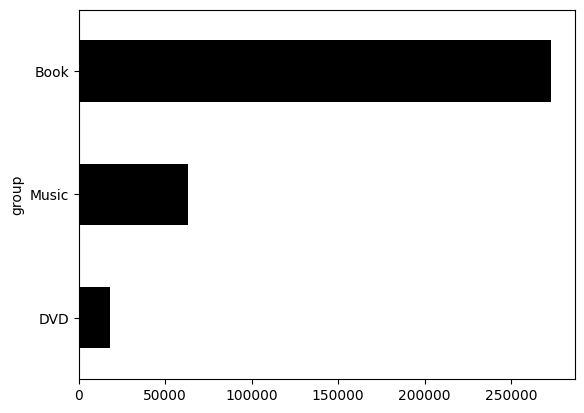

In [26]:
#This graph shows the relationship between the type of product and the quantity in the dataset
full_dataSet_dataframe.groupby('group').size().sort_values().plot(kind='barh', color='black')

In [27]:
#Count products per category
count_categories = full_dataSet_dataframe['categories'].value_counts()
count_categories

categories
Children's Books           30497
Nonfiction                 23671
Religion & Spirituality    23551
Literature & Fiction       21891
Health, Mind & Body        16708
                           ...  
Stephen E. Ambrose             4
Camera & Photo                 3
HOWdesign Studio               1
Camera & Photo Brands          1
Video & Music                  1
Name: count, Length: 93, dtype: int64

In [28]:
#When we look at the 10 categories with the most products, we notice that they are all books
#As the result would include Genres as one of the T
filtered_data = full_dataSet_dataframe[full_dataSet_dataframe['categories'] != 'Genres']

top_10_categories = filtered_data['categories'].value_counts().head(10)
top_10_categories

categories
Children's Books           30497
Nonfiction                 23671
Religion & Spirituality    23551
Literature & Fiction       21891
Health, Mind & Body        16708
Business & Investing       14745
Home & Garden              10995
History                    10481
Computers & Internet       10441
Entertainment               9078
Name: count, dtype: int64

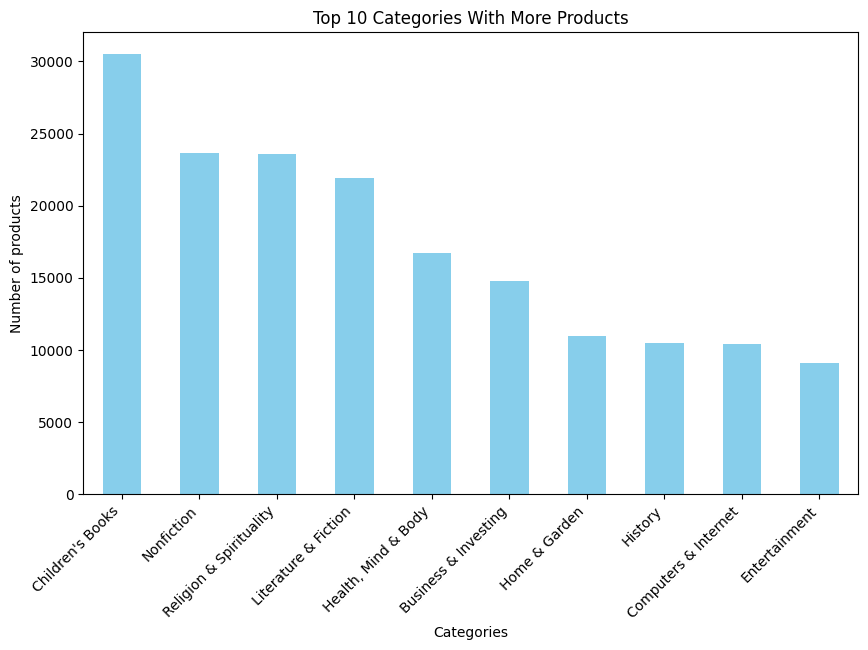

In [29]:
#Creates the bar chart for the 10 most frequent categories 
top_10_categories.plot(kind='bar', figsize=(10, 6),color='skyblue')

plt.title('Top 10 Categories With More Products')
plt.xlabel('Categories')
plt.ylabel('Number of products')

plt.xticks(rotation=45, ha='right')

plt.show()

In [30]:
#Let's see how many categories we have at first -> result 61
initial_categories = full_dataSet_dataframe[full_dataSet_dataframe['group'] == 'Book']
initial_categories['categories'].value_counts()

categories
Children's Books           30496
Nonfiction                 23670
Religion & Spirituality    23551
Literature & Fiction       21887
Health, Mind & Body        16707
                           ...  
Pop                            1
Miscellaneous                  1
Opera & Vocal                  1
HOWdesign Studio               1
Actors & Actresses             1
Name: count, Length: 61, dtype: int64

In [181]:
#Remove the categories that are not from books because they are not relevant to the study
unwanted_categories = ['jp-unknown1', 'jp-unknown2', 'jp-unknown3', 'Genres', 'Reference', 'Books on Tape','Book Clubs','Bargain Books','Books on CD',"O'Reilly",
                       'New & Used Textbooks','Home & Office','Boxed Sets','McGraw-Hill','Sheet Music & Scores','Book Accessories','Holiday Greeting Cards','Accessories',
                       'Books, Music & More','Gift Categories','Classical','Camera & Photo','Calendars', 'Libros en español','Foreign Language Books', 'Parenting & Families','Engineering'
                       'Large Print', 'Stephen E. Ambrose', 'Miscellaneous', 'HOWdesign Studio','John Wiley & Sons', 'Opera & Vocal', 'Large Print', 'Pop', 'Gay & Lesbian', 'Camera & Photo Brands'] 
book = full_dataSet_dataframe[full_dataSet_dataframe['group'] == 'Book']
book = book[~book['categories'].isin(unwanted_categories)]

book

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
1,0738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9..."
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4]
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[]
5,0486220125,Book,How the Other Half Lives: Studies Among the Te...,"[0486401960, 0452283612, 0486229076, 071484034...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI..."
...,...,...,...,...,...,...
516511,0006176909,Book,House of Cards,"[0006471641, 0006477097, B00009MGGI, 000649799...",Mystery & Thrillers,"[A1MMBWP20WQ2N3 - 5, A3R803J7QXVUI1 - 3, A2FOS..."
516512,0786632550,Book,Mel Bay's Complete Traditional Holiday Season ...,"[079357000X, 0793529395, 0793585031, 0634002066]",Entertainment,"[AR0807T2MTJBL - 4, A2CC70LC14MNT7 - 5, A29TSN..."
516514,4770023286,Book,Sengai: Master Zen Painter,"[4770029446, 1570624895]",Arts & Photography,[AOV39AQYLNIRG - 4]
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,"[0689808747, 0689820305, 0859531821, 006026686...",Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV..."


In [37]:
# Qunatity of categories after removing those that are not relevant -> result = 28
book_categories = book['categories'].value_counts()

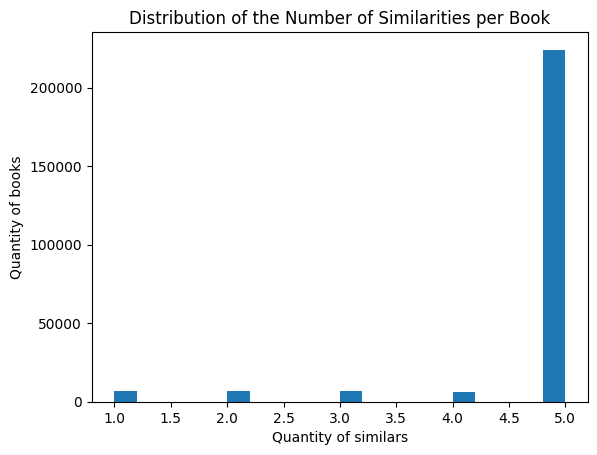

In [38]:
#In the original dataframe we have a maximum of 5 similar books per product, but that doesn't tell us much about the quantity of similars that one product actually has in the whole dataset
book['similarity_count'] = book['similarities'].apply(len)

book['similarity_count'].plot(kind='hist', bins=20) 

plt.title('Distribution of the Number of Similarities per Book')
plt.xlabel('Quantity of similars')
plt.ylabel('Quantity of books')
plt.show()

In [39]:
#Explode of the dataframe will allow us to know which and how many similar books each book has
#Analysis of this data led to the recognition that not all similar products are products that exist in the dataset itself
book_exploded = book.explode('similarities')
book_exploded

,id,group,title,similarities,categories,reviews,similarity_count
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0804215715,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,156101074X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687023955,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687074231,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,082721619X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
...,...,...,...,...,...,...,...
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1931709920,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,188187110X,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,081890643X,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4],5


In [40]:
#Vamos ver os Ids das similarities que nao estão na coluna id e retira-los
#depois queremos saber quantas vezes é que aquelas categorias foram compradas em conjunto
book_exploded = book_exploded[book_exploded['similarities'].isin(book['id'])]
book_exploded

,id,group,title,similarities,categories,reviews,similarity_count
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0804215715,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,156101074X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687023955,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687074231,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,082721619X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
...,...,...,...,...,...,...,...
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0859531821,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0060266864,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0916291820,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4],5


In [41]:
#To know how often one product appears as similar to another in the dataset
count_ids_by_similarities = book_exploded[['id','similarities']].groupby('similarities',as_index=False).count()
count_ids_by_similarities

,similarities,id
0,0001472933,2
1,0001955071,1
2,0002154129,10
3,0002154463,6
4,0002159317,3
...,...,...
152488,9997053060,2
152489,9999366651,2
152490,B00008JYQ3,6
152491,B00008NRHJ,5


In [42]:
# Of the values obtained by counting the quantity of similars we can observe the median, maximum and minimum values
median = count_ids_by_similarities['id'].median()
maximum = count_ids_by_similarities['id'].max()
minimum = count_ids_by_similarities['id'].min()
print(median, maximum, minimum)

3.0 295 1


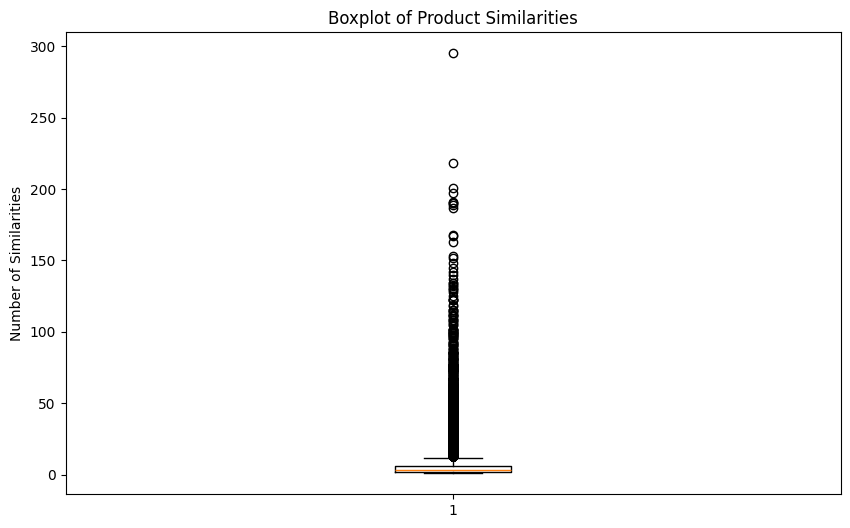

In [43]:
#Boxplot that represents count_ids_by_similarities
plt.figure(figsize=(10, 6))
plt.boxplot(count_ids_by_similarities['id'])
plt.title('Boxplot of Product Similarities')
plt.ylabel('Number of Similarities')
plt.show()


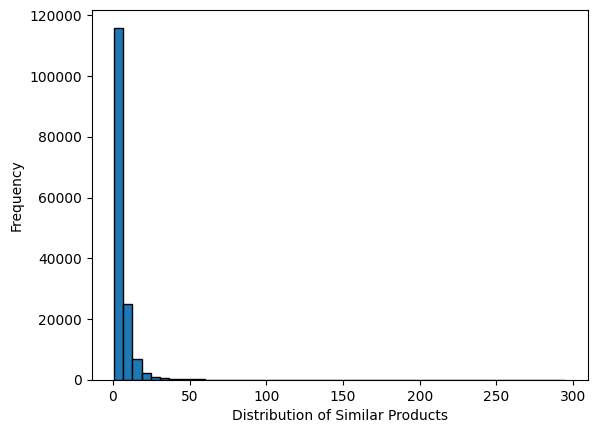

In [44]:
#Histogram that represents 
plt.hist(count_ids_by_similarities['id'], bins=50, edgecolor='black') 
plt.xlabel('Distribution of Similar Products')
plt.ylabel('Frequency')

plt.show()

In [45]:
#In order to know the best cut-off point for analyzing the data that gives us information on the relations between the percentage of products and the number of products recommended
#10% of the values are less than or equal to 1.0.
count_ids_by_similarities['id'].quantile([0.01,0.05,0.1,0.5,0.6,0.75,0.9])

0.01     1.0
0.05     1.0
0.10     1.0
0.50     3.0
0.60     4.0
0.75     6.0
0.90    11.0
Name: id, dtype: float64

## Network Category-Category
--- Process to create network category-category ---
It should be noted that during this analysis we refer to book category and book genre as the same

In [46]:
#Let's look at the relationship between the Id and the product genre. We group products by category.
study_categories = book[['categories','id']].groupby('categories')
study_categories

In [47]:
#Let's start looking in more detail at category-category and product-product relationships
merged_dataframe = pd.merge(book_exploded[['id','categories','similarities']], book[['id','categories']], left_on='similarities', right_on='id', how='left')
merged_dataframe

,id_x,categories_x,similarities,id_y,categories_y
0,0827229534,Religion & Spirituality,0804215715,0804215715,Religion & Spirituality
1,0827229534,Religion & Spirituality,156101074X,156101074X,Religion & Spirituality
2,0827229534,Religion & Spirituality,0687023955,0687023955,Religion & Spirituality
3,0827229534,Religion & Spirituality,0687074231,0687074231,Religion & Spirituality
4,0827229534,Religion & Spirituality,082721619X,082721619X,Religion & Spirituality
...,...,...,...,...,...
787569,0060537612,Children's Books,0859531821,0859531821,Children's Books
787570,0060537612,Children's Books,0060266864,0060266864,Children's Books
787571,0060537612,Children's Books,0916291820,0916291820,Children's Books
787572,0879736836,Nonfiction,1580510469,1580510469,Religion & Spirituality


In [48]:
#The columns show the related genres
merged_dataframe[['categories_x', 'categories_y']]

,categories_x,categories_y
0,Religion & Spirituality,Religion & Spirituality
1,Religion & Spirituality,Religion & Spirituality
2,Religion & Spirituality,Religion & Spirituality
3,Religion & Spirituality,Religion & Spirituality
4,Religion & Spirituality,Religion & Spirituality
...,...,...
787569,Children's Books,Children's Books
787570,Children's Books,Children's Books
787571,Children's Books,Children's Books
787572,Nonfiction,Religion & Spirituality


In [49]:
#categories_relation represents all existing relations between genres
categories_relation = merged_dataframe[['categories_x', 'categories_y']].groupby(['categories_x', 'categories_y']).size().reset_index(name='count')

---- Network Category-Category is created! Named categories_relation ----

In [50]:
#categoriess_relation representa todas as relações existentes entre generos
#a este ponto cats_relation ainda temos o erro de a-> B como B->A que sumenta erradamente o numero de relações existentes
categories_relation.to_csv('categories_relation.csv')


### Q1 - How often do you buy books in one genre compared to books in different genres?

#### Network Category-Category: Same Genres


In [51]:
# categories_relation is not filtered 
# consider only those that are equal - see the quantity - see the quantity of equal generos and compare with the result below that only has different ones
file_path = 'categories_relation.csv'
study_categories = pd.read_csv(file_path)
study_categories.drop(study_categories.columns[0], axis=1, inplace=True)
study_categories.columns = ['Source', 'Target', 'Weight']
study_categories

,Source,Target,Weight
0,Arts & Photography,Arts & Photography,18759
1,Arts & Photography,Biographies & Memoirs,473
2,Arts & Photography,Business & Investing,276
3,Arts & Photography,Children's Books,650
4,Arts & Photography,Comics & Graphic Novels,114
...,...,...,...
660,Travel,Science,249
661,Travel,Science Fiction & Fantasy,1
662,Travel,Sports,504
663,Travel,Teens,2


In [52]:
#We analyse information on the weight of products
max_weight = study_categories['Weight'].max()  # Maximum value
min_weight = study_categories['Weight'].min()  # Minimum value
average_weight = study_categories['Weight'].mean()  # Average value

print(max_weight)
print(min_weight)
print(average_weight)

99954
1
1184.3218045112783


<Axes: >

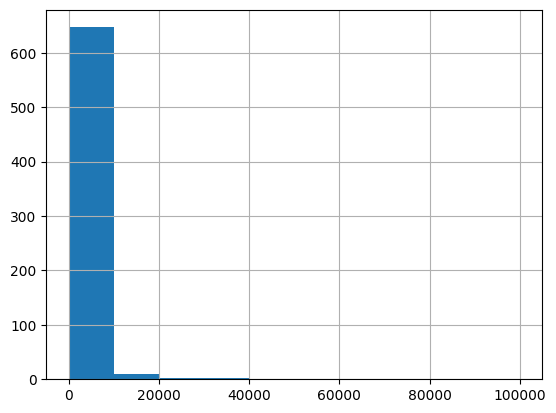

In [53]:
#Observamos que garnde parte das relaçóes existentes, um numero que chega quase aos 700, tem um peso(produtos exitentes no conjunto) perto dos 10mil
study_categories['Weight'].hist()

#### Network Category-Category: different genres
---- a partir daqui vamos filtrar o dataframe das categorias e retirar informação pertinente ao estudo ----

In [54]:
#Do resultado apresentado no grafico anterior notamos que: cats_relation apresenta relações entre generos iguais. 
#Dado esta ocorrência decidimos analisar os valores de relações entre generos iguais e generos diferentes de modo a ver o impacto destas relações na rede cats relation original!
categories_unfiltered = study_categories[study_categories['Source'] == study_categories['Target']]
categories_unfiltered.to_csv('SourceTargetEqual_csv_file.csv', index=False)

In [55]:
#Observamos assim o peso das relações entre generos literarios iguais
file_path = 'SourceTargetEqual_csv_file.csv'
unfiltered_categories = pd.read_csv(file_path)
unfiltered_categories 

,Source,Target,Weight
0,Arts & Photography,Arts & Photography,18759
1,Biographies & Memoirs,Biographies & Memoirs,9216
2,Business & Investing,Business & Investing,35711
3,Children's Books,Children's Books,99954
4,Comics & Graphic Novels,Comics & Graphic Novels,5534
5,Computers & Internet,Computers & Internet,29306
6,"Cooking, Food & Wine","Cooking, Food & Wine",14204
7,Engineering,Engineering,4927
8,Entertainment,Entertainment,19480
9,"Health, Mind & Body","Health, Mind & Body",39870


<Axes: >

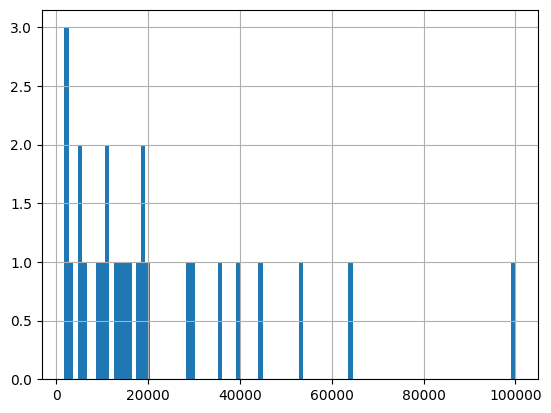

In [56]:
unfiltered_categories['Weight'].hist(bins=100)

In [57]:
#Unfiltered cats max, min and average
max_weight = unfiltered_categories['Weight'].max()  # Maximum value
min_weight = unfiltered_categories['Weight'].min()  # Minimum value
average_weight = unfiltered_categories['Weight'].mean()  # Average value

print(np.quantile(unfiltered_categories['Weight'],0.50))
print('Max:',max_weight)
print('Min:', min_weight)
print('Average:',average_weight)

15130.0
Max: 99954
Min: 1778
Average: 22058.11111111111


In [58]:
#Criamos a rede entre generos diferentes  
categories_filtered = study_categories[study_categories['Source'] != study_categories['Target']]
categories_filtered.to_csv('filtered_csv_file.csv', index=False)

In [59]:
file_path = 'filtered_csv_file.csv'
filtered_categories = pd.read_csv(file_path)

<Axes: >

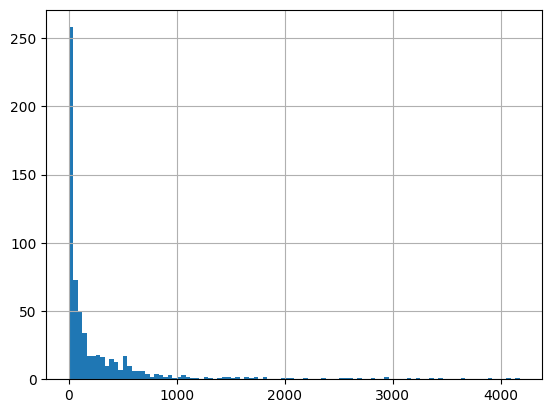

In [60]:
filtered_categories['Weight'].hist(bins=100)

In [61]:
#We observe the data and compare it with the previous ones
max_weight = filtered_categories['Weight'].max()  
min_weight = filtered_categories['Weight'].min()  
average_weight = filtered_categories['Weight'].mean()  

print(np.quantile(filtered_categories['Weight'],0.50))
print('Max:',max_weight)
print('Min:', min_weight)
print('Average:',average_weight)

76.5
Max: 4173
Min: 1
Average: 300.94827586206895


In [62]:
# 4 communities were found in the filtered genre-genre network
file_path = 'modularidade_rede_categoria_categoria_filtrada.csv'
filtered_csv_modularity = pd.read_csv(file_path)
filtered_csv_modularity.set_index('Id')

,modularity_class
Id,
Arts & Photography,2
Biographies & Memoirs,1
Business & Investing,1
Children's Books,0
Comics & Graphic Novels,0
Computers & Internet,2
"Cooking, Food & Wine",1
Engineering,2
Entertainment,0


In [63]:
#We group together genres that are from the same community, so we know how they are composed
grouped_genres = filtered_csv_modularity.groupby('modularity_class')
groups = {name: group for name, group in grouped_genres}
groups

{0:                            Id  modularity_class
 3            Children's Books                 0
 4     Comics & Graphic Novels                 0
 8               Entertainment                 0
 12                     Horror                 0
 14       Literature & Fiction                 0
 16        Mystery & Thrillers                 0
 21                    Romance                 0
 23  Science Fiction & Fantasy                 0
 25                      Teens                 0,
 1:                          Id  modularity_class
 1     Biographies & Memoirs                 1
 2      Business & Investing                 1
 6      Cooking, Food & Wine                 1
 9       Health, Mind & Body                 1
 10                  History                 1
 13                      Law                 1
 15                 Medicine                 1
 17               Nonfiction                 1
 20  Religion & Spirituality                 1
 24                   Sports     

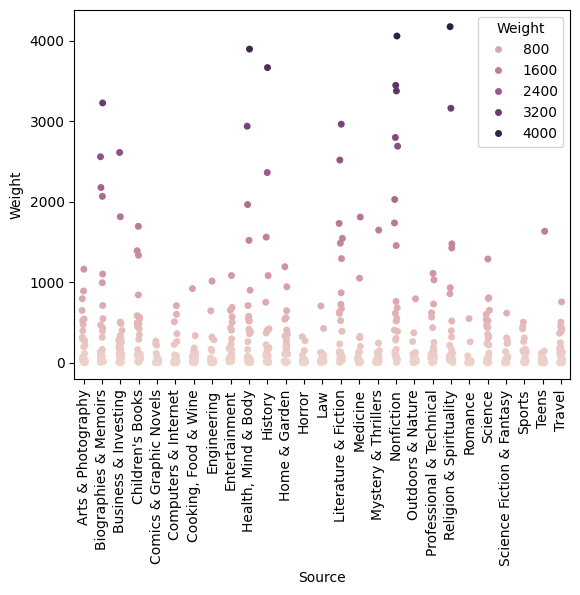

In [64]:
#A stripplot was created based on categories_filtered 
sns.stripplot(data=categories_filtered, x='Source', y='Weight', hue='Weight')
plt.xticks(rotation=90)
plt.show()

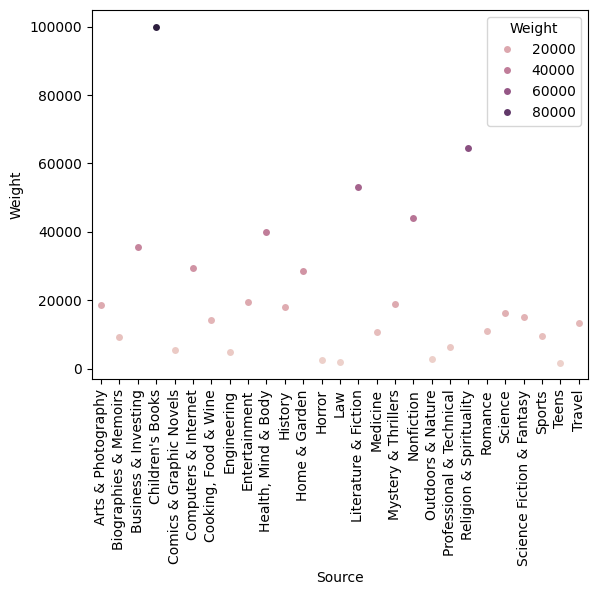

In [65]:
#A stripplot was created based on unfiltered_categories 
sns.stripplot(data=unfiltered_categories, x='Source', y='Weight', hue='Weight')
plt.xticks(rotation=90)
plt.show()

In [66]:
# The following to steps were created with the aim to compare and analyse the genre relation when books are the same genre and when they are from different genre
# Step 1 - We create a new column in study_categories so that we can know wich wich objects that are related are form the same/ different genre
study_categories['Genre Relation'] = np.where(study_categories['Source'] == study_categories['Target'],'Same Genre', 'Different Genre')

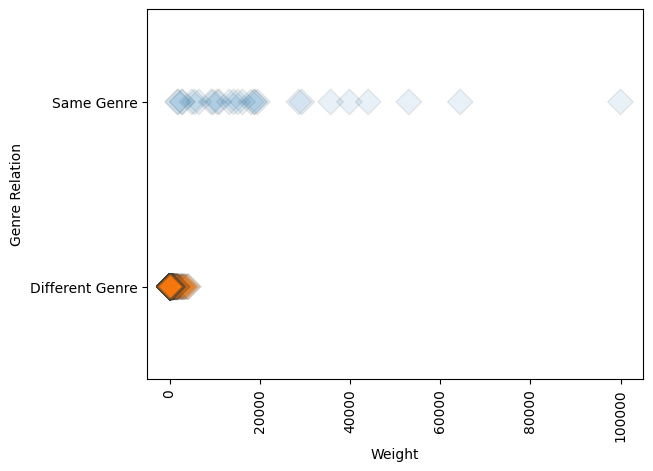

In [67]:
#Step 2 - Creation of a Strippplot -Opens the possibility to visualy analyse the existing relation between genre and weight
sns.stripplot(data=study_categories, x='Weight', y='Genre Relation', hue='Genre Relation', jitter=False, s=13, marker="D", linewidth=1, alpha=.1,)
plt.xticks(rotation=90)
plt.show()

### Q2 -  What different genres are often bought together?
--- Let's normalize the data ---

In [68]:
# Let's refresh our memory
book_categories

categories
Children's Books             30496
Nonfiction                   23670
Religion & Spirituality      23551
Literature & Fiction         21887
Health, Mind & Body          16707
Business & Investing         14745
Home & Garden                10995
History                      10481
Computers & Internet         10441
Entertainment                 9075
Biographies & Memoirs         9022
Arts & Photography            8999
Science                       8245
Travel                        7083
Mystery & Thrillers           6822
Medicine                      5426
Science Fiction & Fantasy     5401
Cooking, Food & Wine          5209
Sports                        4148
Professional & Technical      4102
Romance                       3833
Engineering                   2774
Comics & Graphic Novels       2216
Outdoors & Nature             1665
Law                           1495
Teens                         1188
Horror                        1146
Actors & Actresses               1
Name: cou

In [69]:
# To normalize the data we need to evaluate the weights
book_categories_df = book_categories.reset_index()
book_categories_df.columns = ['Category', 'Value']

In [70]:
#From this dataframe let's compare the weights and see how much they've changed. Is the heaviest relation still the same?
merged_df = pd.merge(filtered_categories, book_categories_df, left_on='Source', right_on='Category', how='left')
merged_target = pd.merge(merged_df, book_categories_df, left_on='Target', right_on='Category', how='left')
merged_target['Min_value'] = merged_target[['Value_x', 'Value_y']].min(axis=1)
merged_target['Max_value'] = merged_target[['Value_x', 'Value_y']].max(axis=1)
merged_target['Normalized_weight'] = (merged_target['Weight']/merged_target['Min_value'])
merged_target

,Source,Target,Weight,Category_x,Value_x,Category_y,Value_y,Min_value,Max_value,Normalized_weight
0,Arts & Photography,Biographies & Memoirs,473,Arts & Photography,8999,Biographies & Memoirs,9022,8999,9022,0.052561
1,Arts & Photography,Business & Investing,276,Arts & Photography,8999,Business & Investing,14745,8999,14745,0.030670
2,Arts & Photography,Children's Books,650,Arts & Photography,8999,Children's Books,30496,8999,30496,0.072230
3,Arts & Photography,Comics & Graphic Novels,114,Arts & Photography,8999,Comics & Graphic Novels,2216,2216,8999,0.051444
4,Arts & Photography,Computers & Internet,198,Arts & Photography,8999,Computers & Internet,10441,8999,10441,0.022002
...,...,...,...,...,...,...,...,...,...,...
633,Travel,Religion & Spirituality,176,Travel,7083,Religion & Spirituality,23551,7083,23551,0.024848
634,Travel,Science,249,Travel,7083,Science,8245,7083,8245,0.035155
635,Travel,Science Fiction & Fantasy,1,Travel,7083,Science Fiction & Fantasy,5401,5401,7083,0.000185
636,Travel,Sports,504,Travel,7083,Sports,4148,4148,7083,0.121504


In [71]:
#sorce - target - normalized weight
merged_target[['Source','Target','Normalized_weight']].sort_values(by='Normalized_weight', ascending=False)

,Source,Target,Normalized_weight
100,Children's Books,Teens,1.425926
594,Teens,Children's Books,1.374579
537,Science,Outdoors & Nature,0.479279
449,Outdoors & Nature,Science,0.476877
326,Law,Nonfiction,0.471572
...,...,...,...
550,Science Fiction & Fantasy,"Cooking, Food & Wine",0.000192
557,Science Fiction & Fantasy,Medicine,0.000185
565,Science Fiction & Fantasy,Travel,0.000185
635,Travel,Science Fiction & Fantasy,0.000185


In [72]:
#  source - target - Original weight
merged_target[['Source','Target','Weight']].sort_values(by ='Weight', ascending=False)

,Source,Target,Weight
484,Religion & Spirituality,"Health, Mind & Body",4173
415,Nonfiction,History,4057
238,"Health, Mind & Body",Religion & Spirituality,3895
261,History,Nonfiction,3665
424,Nonfiction,Religion & Spirituality,3445
...,...,...,...
557,Science Fiction & Fantasy,Medicine,1
301,Horror,"Health, Mind & Body",1
512,Romance,Medicine,1
172,"Cooking, Food & Wine",Teens,1


## Network Product-Product

----- Process to create network product-product ----- Escolhemos que parte do dataset vamos estudar para a relação produto-produto ------

In [123]:
#Here we decide which part of the dataset will be analyzed - so the goal for this one is to go beyond the 5 recommendations
restricao = count_ids_by_similarities[count_ids_by_similarities['id'] <= 4]
print(len(restricao))

book_filtrado = book[book['id'].isin(restricao['similarities'].to_list())]

94857


In [74]:
#For this new cut we need to do explode as we did initially
book_exploded_2 = book_filtrado.explode('similarities')
book_exploded_2

,id,group,title,similarities,categories,reviews,similarity_count
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0842328130,Religion & Spirituality,[A2591BUPXCS705 - 4],5
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0830818138,Religion & Spirituality,[A2591BUPXCS705 - 4],5
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0842330313,Religion & Spirituality,[A2591BUPXCS705 - 4],5
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0842328610,Religion & Spirituality,[A2591BUPXCS705 - 4],5
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0842328572,Religion & Spirituality,[A2591BUPXCS705 - 4],5
...,...,...,...,...,...,...,...
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1931709920,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,188187110X,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,081890643X,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4],5


In [102]:
number_of_duplicates = book_exploded_2['id'].duplicated(keep='first').sum()

print(number_of_duplicates)

363855


In [77]:
#We create the csv that shows the relationship between products. We call this file produts_relation
products_network = book_exploded_2[['id','similarities']]
products_network.to_csv('produts_relation.csv')
products_network

,id,similarities
3,0842328327,0842328130
3,0842328327,0830818138
3,0842328327,0842330313
3,0842328327,0842328610
3,0842328327,0842328572
...,...,...
516530,0879736836,1931709920
516530,0879736836,188187110X
516530,0879736836,081890643X
516530,0879736836,1580510469


In [124]:
# Modularity counts the number of books per community. Given the result we know that 380 groups contain 5 or fewer elements
#len(modularity[modularity<=5])

<Axes: ylabel='Frequency'>

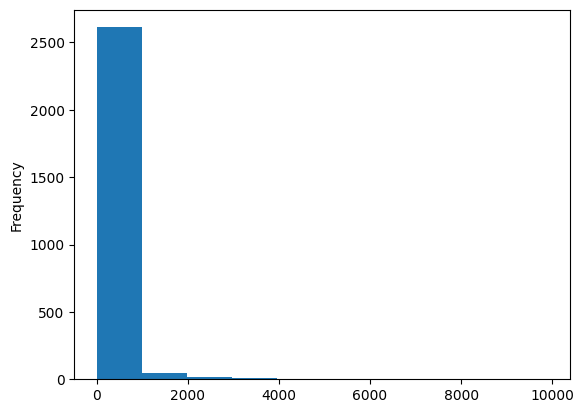

In [ ]:
#modularity.plot(kind='hist')

### Q3 - Modelação em rede permite ir além das recomendações quem comprou X também comprou Y?
-- Como responder fazer histograma com número de nós por comunidade. Quantas comunidades têm mais de 5 elementos? --

In [202]:
# Foi importado do gephi o ficheiro que mostra a modularidade da rede produto-produto
file_path ='modularidade_rede_produto_produto.csv'
product_h = pd.read_csv(file_path)
product_h = product_h.set_index('Id')
product_h = product_h.rename(columns={'Id': 'id'})
product_h


,modularity_class
Id,
842328327,82
842328130,82
830818138,82
842330313,82
842328610,82
...,...
2060000335,1036
4770027613,759
310479711,1432


In [206]:
product_h.index[0]

'842328327'

In [200]:
book.loc[0,'id']

'0827229534'

In [147]:
# Foi importado do gephi o ficheiro que mostra a modularidade da rede produto-produto
#file_path ='modularidade_rede_produto_produto.csv'
#product_h = pd.read_csv(file_path)
#duplicates = product_h['Id'].duplicated().any()
#duplicates

In [148]:
# Vejamoos quais e quantas comunidades existem = 2681
test_group = product_h.groupby('modularity_class')
modularity_grouped = {name: group for name, group in test_group}
modularity_grouped

{0:                 id  modularity_class
 57       471150274                 0
 58       471203092                 0
 59      013061081X                 0
 60       130081779                 0
 61      1852331666                 0
 62        70121893                 0
 190603  1584502657                 0,
 1:                id  modularity_class
 67      439240751                 1
 68      439492327                 1
 69      439240727                 1
 70      439240719                 1
 71      439240700                 1
 72       61062499                 1
 58931   439240735                 1
 58932   439240743                 1
 58933   439472199                 1
 106448  439492270                 1
 106449  439492300                 1
 210980  786817968                 1,
 2:                 id  modularity_class
 103      375803394                 2
 104     037580336X                 2
 105      375826416                 2
 106       61066249                 2
 107      3758

In [149]:
test_group = product_h.groupby('modularity_class').size()
quantidade_grupo = test_group[test_group>5].count()

print(quantidade_grupo, "das 2681 comunidades, têm mais de 5 elementos")

2301 das 2681 comunidades, têm mais de 5 elementos


<Axes: >

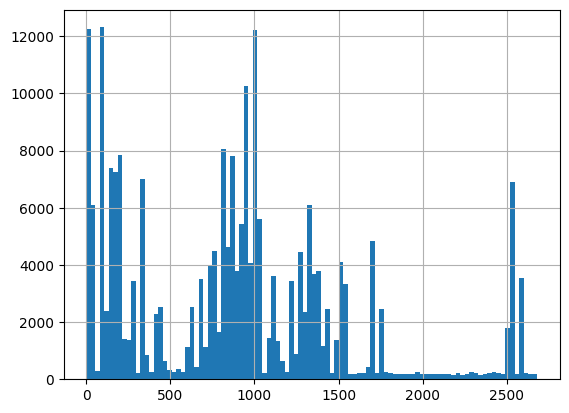

In [150]:
product_h['modularity_class'].hist(bins=100)

### Q4 - Qual a variabilidade de género dentro das comunidades?
-- Como responder para cada comunidade obter o género dos livros e contar número de géneros diferentes, bem como a percentagem dominante --

In [203]:
# obter o género dos livros e contar número de géneros diferentes -  fazer merge com a original
# Assuming 'id' is the common column between both dataframes and is set as the index in product_h.
#O problema encontrado: numero de produtos diminui imenso(verifiquei que não há duplicados então nao sei qual pode ser o problema) - JA
trial = product_h.merge(book, right_on='id', left_index=True, how='left')
trial

,modularity_class,id,group,title,similarities,categories,reviews
NaN,82,842328327,NaN,NaN,NaN,NaN,NaN
NaN,82,842328130,NaN,NaN,NaN,NaN,NaN
NaN,82,830818138,NaN,NaN,NaN,NaN,NaN
NaN,82,842330313,NaN,NaN,NaN,NaN,NaN
NaN,82,842328610,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
NaN,1036,2060000335,NaN,NaN,NaN,NaN,NaN
516504.0,759,4770027613,Book,Japanese Country Style: Putting New Life into ...,"[0804832625, 158685027X, 4770023537, 081183675...",Home & Garden,[A39B12UH2GKX3O - 5]
NaN,1432,310479711,NaN,NaN,NaN,NaN,NaN
NaN,885,188187110X,NaN,NaN,NaN,NaN,NaN


In [213]:
s = book[book['id'] == 842328327]
s

,id,group,title,similarities,categories,reviews


In [211]:
len([elemento for elemento in product_h.index.to_list()if elemento not in book.id ])

229803

In [212]:
len(product_h)

229803

In [205]:
trial.iloc[0,'id']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [190]:
teste2 = trial[['id', 'categories', 'modularity_class']]
teste2

,id,categories,modularity_class
4,1577943082,Religion & Spirituality,171
11,1590770218,"Health, Mind & Body",1364
19,3895780812,Medicine,866
25,1590930509,Children's Books,22
27,1893732290,Religion & Spirituality,791
...,...,...,...
516482,1571201718,Home & Garden,1002
516483,1885106378,Outdoors & Nature,858
516490,158483000X,Religion & Spirituality,82
516503,2060000912,Travel,1036


In [194]:
agrupar = {name: group for name, group in teste2.groupby('modularity_class')}
agrupar

{0:                 id            categories  modularity_class
 85747   1852331666  Computers & Internet                 0
 332694  013061081X  Computers & Internet                 0
 356835  1584502657  Computers & Internet                 0,
 2:                 id        categories  modularity_class
 455320  037580336X  Children's Books                 2,
 4:                 id        categories  modularity_class
 293191  055348737X  Children's Books                 4,
 5:                 id     categories  modularity_class
 327381  089724608X  Entertainment                 5,
 7:                 id            categories  modularity_class
 71896   067978120X   Mystery & Thrillers                 7
 172404  067976268X  Literature & Fiction                 7,
 8:                 id           categories  modularity_class
 1985    1882418077    Outdoors & Nature                 8
 15134   1892216248               Sports                 8
 22710   038072541X  Mystery & Thrillers          

In [195]:
category_counts = teste2['categories'].value_counts()
category_counts

In [157]:
trial = book.merge(product_h, left_on='id', right_index=True, how='inner')
trial

,id,group,title,similarities,categories,reviews,similarity_count,modularity_class
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[],5,171
11,1590770218,Book,Fantastic Food with Splenda : 160 Great Recipe...,"[0871319640, 0399530258, 1590770536, 158040197...","Health, Mind & Body","[A2V9UBVMQFDV20 - 5, A3NXQLHXJZO5FB - 5, A1RNV...",5,1364
19,3895780812,Book,"Computed Tomography : Fundamentals, System Tec...","[0865778973, 0071343547, 0721662854, 072168173...",Medicine,[AWHGCJOOZBTB5 - 5],5,866
25,1590930509,Book,Chicken Little,"[0439078172, 0899192254, 0688070450, 089919349...",Children's Books,[A1SMZFT2R1QBRW - 4],5,22
27,1893732290,Book,God Knows Marriage Isn't Always Easy: 12 Ways ...,"[189373238X, 1893732398, 0609805797]",Religion & Spirituality,[],3,791
...,...,...,...,...,...,...,...,...
516482,1571201718,Book,"250 Continuous-Line Quilting Designs for Hand,...","[1571201467, 0486417026, 157120184X, 048628013...",Home & Garden,"[A2Z2EMOAQLNBYK - 4, A14OJS0VWMOSWO - 5, A3VDI...",5,1002
516483,1885106378,Book,Flyfisher's Guide to Wyoming (Flyfisher's Guides),"[155821545X, 1885106955, 1585745308, 157188164...",Outdoors & Nature,"[A2PPY3R9YKGGIU - 5, A282VT5BUQDFPT - 5]",5,858
516490,158483000X,Book,Needless Casualties of War,"[1584830492, 096290497X, 0768422329, 158483037...",Religion & Spirituality,"[A2IKNL1OQ0HOP4 - 4, A3GSI8Q25U5438 - 5, A1MH4...",5,82
516503,2060000912,Book,Michelin the Green Guide Berlin and Potsdam (M...,"[1886705410, 0789494302, 2060000335, 188659007...",Travel,[A33WM7N3DJMTI4 - 5],5,1036
